<a href="https://colab.research.google.com/github/brownnys/app-pandai/blob/main/PandaiApp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os

# Untuk memastikan hasil konsisten
np.random.seed(42)
tf.random.set_seed(42)

# DATA PREPARATION

In [5]:
df = pd.read_csv("StudentsPerformance.csv")

print("===== 5 Data Teratas =====")
print(df.head())

===== 5 Data Teratas =====
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [6]:
print("\n===== Info Dataset =====")
print(df.info())


===== Info Dataset =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


# Data Loading

In [23]:
df["avg_score"] = (df["math score"] + df["reading score"] + df["writing score"]) / 3
#Buat label tingkat kesulitan berdasarkan nilai rata-rata
def assign_difficulty(score):
    if score < 60:
        return "easy"
    elif score < 80:
        return "medium"
    else:
        return "hard"

df["difficulty_next"] = df["avg_score"].apply(assign_difficulty)

In [24]:
# Pilih fitur numerik utama dan kategorikal terkait
data = df[["math score", "reading score", "writing score", "test preparation course", "difficulty_next"]]
print("\n🔹 Data yang digunakan:")
print(data.head())


🔹 Data yang digunakan:
   math score  reading score  writing score  test preparation course  \
0          72             72             74                        1   
1          69             90             88                        0   
2          90             95             93                        1   
3          47             57             44                        1   
4          76             78             75                        1   

  difficulty_next  
0          medium  
1            hard  
2            hard  
3            easy  
4          medium  


# Data Preprocessing

In [25]:
# Encode fitur kategorikal
encoder = LabelEncoder()
data["test preparation course"] = encoder.fit_transform(data["test preparation course"])
data["difficulty_next"] = encoder.fit_transform(data["difficulty_next"])

/tmp/ipython-input-2359680695.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["test preparation course"] = encoder.fit_transform(data["test preparation course"])
/tmp/ipython-input-2359680695.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["difficulty_next"] = encoder.fit_transform(data["difficulty_next"])


In [26]:
# Pisahkan fitur dan label
X = data[["math score", "reading score", "writing score", "test preparation course"]]
y = data["difficulty_next"]

# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nData setelah preprocessing:")
print(pd.DataFrame(X_scaled, columns=X.columns).head())


Data setelah preprocessing:
   math score  reading score  writing score  test preparation course
0    0.390024       0.193999       0.391492                 0.746748
1    0.192076       1.427476       1.313269                -1.339140
2    1.577711       1.770109       1.642475                 0.746748
3   -1.259543      -0.833899      -1.583744                 0.746748
4    0.653954       0.605158       0.457333                 0.746748


# Split Dataset

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nData latih: {X_train.shape}, Data uji: {X_test.shape}")


Data latih: (800, 4), Data uji: (200, 4)


# Modelling

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # easy, medium, hard
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\n Arsitektur Model:")
model.summary()


 Arsitektur Model:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,499 (9.76 KB)

 Trainable params: 2,499 (9.76 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Training model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=60,
    batch_size=16,
    verbose=1
)

Epoch 1/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5227 - loss: 1.0061 - val_accuracy: 0.8125 - val_loss: 0.7243
Epoch 2/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8494 - loss: 0.6641 - val_accuracy: 0.8938 - val_loss: 0.4579
Epoch 3/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9298 - loss: 0.4140 - val_accuracy: 0.8938 - val_loss: 0.3040
Epoch 4/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9234 - loss: 0.2961 - val_accuracy: 0.9312 - val_loss: 0.2232
Epoch 5/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9436 - loss: 0.2156 - val_accuracy: 0.9688 - val_loss: 0.1780
Epoch 6/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9365 - loss: 0.1839 - val_accuracy: 0.9625 - val_loss: 0.1520
Epoch 7/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9340 - loss: 0.1872 - val_accuracy: 0.9250 - val_loss: 0.1534
Epoch 8/60
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9489 - loss: 0.1441 - val_accuracy: 0.9688 - val_loss:

# Evaluasi dan Visualisasi

In [30]:
# Evaluasi di data uji
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Akurasi Data Uji: {acc*100:.2f}%")


✅ Akurasi Data Uji: 99.50%


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


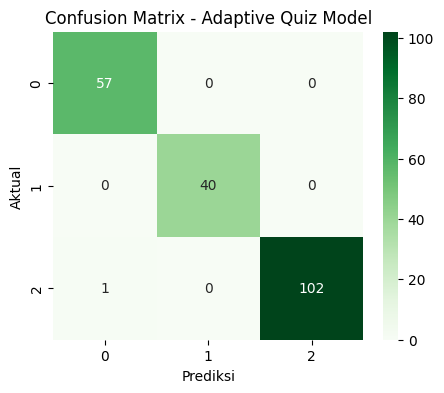

In [31]:
# Prediksi
y_pred = np.argmax(model.predict(X_test), axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Adaptive Quiz Model")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

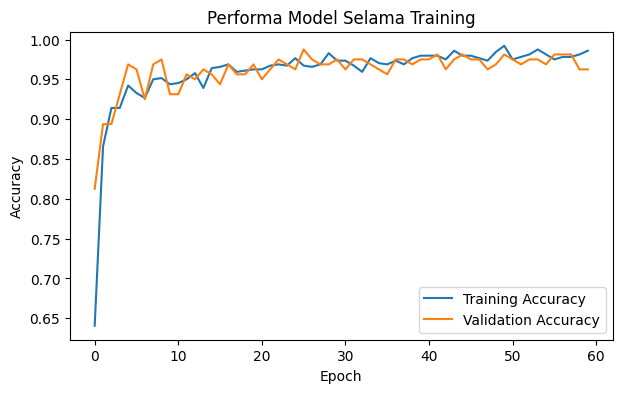


 Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        57
           1       1.00      1.00      1.00        40
           2       1.00      0.99      1.00       103

    accuracy                           0.99       200
   macro avg       0.99      1.00      1.00       200
weighted avg       1.00      0.99      1.00       200



In [33]:
# Grafik akurasi
plt.figure(figsize=(7,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Performa Model Selama Training")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

print("\n Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Konversi Model

In [35]:
model.save("pandai_adaptive_model.h5")

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # quantized model
tflite_model = converter.convert()

with open("pandai_adaptive_model.tflite", "wb") as f:
    f.write(tflite_model)

print("\nModel berhasil dikonversi ke format TFLite!")

Saved artifact at '/tmp/tmp1q6lszp9'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 4), dtype=tf.float32, name='keras_tensor_5')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  137454750474768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137454750475920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137454750472272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137454750476304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137454750469392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137454750475344: TensorSpec(shape=(), dtype=tf.resource, name=None)

Model berhasil dikonversi ke format TFLite!


# Inference

In [37]:
# Contoh input baru: [math, reading, writing, test_preparation_course]
new_data = np.array([[70, 80, 75, 1]])  # sudah ikut persiapan
new_data_scaled = scaler.transform(new_data)

interpreter = tf.lite.Interpreter(model_path="pandai_adaptive_model.tflite")
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

interpreter.set_tensor(input_index, new_data_scaled.astype(np.float32))
interpreter.invoke()
pred = interpreter.get_tensor(output_index)

predicted_class = np.argmax(pred)
difficulty_label = encoder.inverse_transform([predicted_class])[0]
print(f"\n Prediksi Tingkat Kesulitan Berikutnya: {difficulty_label}")


 Prediksi Tingkat Kesulitan Berikutnya: medium


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)
